In [4]:
import csv
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import descartes
from shapely.geometry import Point, Polygon
import adjustText as aT

#Load in the CSV Bike Station Location Data
df = pd.read_csv('HRSQ12020.csv')

#combine the latitude and longitude to make coordinates
df['coordinates'] = df[['Longitude', 'Latitude']].values.tolist()

# Change the coordinates to a geoPoint
df['coordinates'] = df['coordinates'].apply(Point)

#fixing wrong negative value for Latitude
df.loc[df["Latitude"] == df["Latitude"].min()]
df.at[80, 'Latitude'] = 40.467715

In [5]:
#plot the pittsburgh neighborhoods map
pittMap = gpd.read_file('Neighborhoods/ecc95d19-e9fb-46a3-be05-e7e103f362a52020328-1-565pof.jnegf.shp')

#find the centroids of each neighborhood for labeling
pittMap["center"] = pittMap["geometry"].centroid
map_points = pittMap.copy()
map_points.set_geometry("center", inplace = True)
map_points.head()

,objectid,fid_blockg,statefp10,countyfp10,tractce10,blkgrpce10,geoid10,namelsad10,mtfcc10,funcstat10,...,page_numbe,plannerass,created_us,created_da,last_edite,last_edi_1,Shape__Are,Shape__Len,geometry,center
0,1,0.0,42,003,040500,1,420030405001,Block Group 1,G5030,S,...,15,Derek Dauphin,pgh.admin,1571840236403,pgh.admin,1571840236403,7.842997e+06,11525.904546,"POLYGON ((-79.95304 40.44203, -79.95302 40.442...",POINT (-79.95465 40.43862)
1,2,1.0,42,003,040400,1,420030404001,Block Group 1,G5030,S,...,15,Derek Dauphin,pgh.admin,1571840236403,pgh.admin,1571840236403,1.390469e+07,20945.562570,"POLYGON ((-79.95455 40.45882, -79.95427 40.458...",POINT (-79.95356 40.44828)
2,3,2.0,42,003,040200,2,420030402002,Block Group 2,G5030,S,...,15,Derek Dauphin,pgh.admin,1571840236403,pgh.admin,1571840236403,5.998649e+06,18280.484515,"POLYGON ((-79.96230 40.44294, -79.96220 40.442...",POINT (-79.96608 40.44023)
3,4,3.0,42,003,030500,2,420030305002,Block Group 2,G5030,S,...,15,Derek Dauphin,pgh.admin,1571840236403,pgh.admin,1571840236403,7.203337e+06,15697.914337,"POLYGON ((-79.98275 40.44641, -79.98273 40.446...",POINT (-79.98379 40.44274)
4,5,5.0,42,003,020300,1,420030203001,Block Group 1,G5030,S,...,15,Andrea Lavin Kossis,pgh.admin,1571840236403,pgh.admin,1571840236403,1.694875e+07,24019.532672,"POLYGON ((-79.97494 40.45629, -79.97484 40.456...",POINT (-79.98100 40.45383)


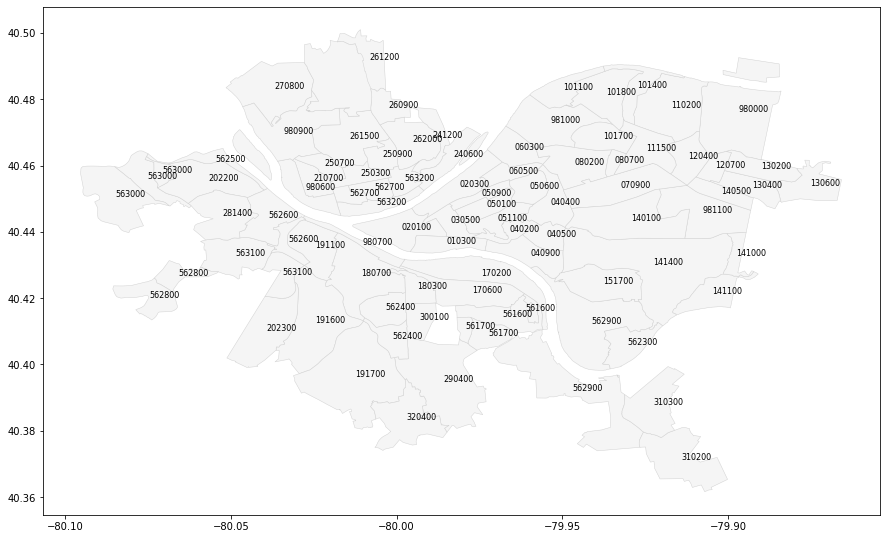

In [14]:
#plot the neighborhood ids on the map
ax = pittMap.plot(figsize = (15, 12), color = "whitesmoke", edgecolor = "lightgrey", linewidth = 0.5)
texts = []

for x, y, label in zip(map_points.geometry.x, map_points.geometry.y, map_points["tractce10"]):
    texts.append(plt.text(x, y, label, fontsize = 8))

#aT.adjust_text(texts, force_points=0.3, force_text=0.8, expand_points=(1,1), expand_text=(1,1), arrowprops=dict(arrowstyle="-", color='grey', lw=0.5))

In [15]:
#find the neighborhood ids that are in Pittsburgh and drop the 'None' cell
col_ID_list = pittMap['tractce10'].tolist()
columns = ['Neighborhoods']
iddf = pd.DataFrame(col_ID_list, columns=columns)

In [16]:
#Change the ID to a float from a string
int_iddf = pd.to_numeric(iddf['Neighborhoods'])
int_iddf = int_iddf.drop(int_iddf.index[89])

In [17]:
#Add those neighborhood ids to a set - we have 88 neighborhoods
idSet = set(int_iddf)
idSet

{10300.0,
 20100.0,
 20300.0,
 30500.0,
 40200.0,
 40400.0,
 40500.0,
 40900.0,
 50100.0,
 50600.0,
 50900.0,
 51100.0,
 60300.0,
 60500.0,
 70900.0,
 80200.0,
 80700.0,
 101100.0,
 101400.0,
 101700.0,
 101800.0,
 110200.0,
 111500.0,
 120400.0,
 120700.0,
 130200.0,
 130400.0,
 130600.0,
 140100.0,
 140500.0,
 141000.0,
 141100.0,
 141400.0,
 151700.0,
 170200.0,
 170600.0,
 180300.0,
 180700.0,
 191100.0,
 191600.0,
 191700.0,
 202200.0,
 202300.0,
 210700.0,
 240600.0,
 241200.0,
 250300.0,
 250700.0,
 250900.0,
 260900.0,
 261200.0,
 261500.0,
 262000.0,
 270800.0,
 281400.0,
 290400.0,
 300100.0,
 310200.0,
 310300.0,
 320400.0,
 561600.0,
 561700.0,
 562300.0,
 562400.0,
 562500.0,
 562600.0,
 562700.0,
 562800.0,
 562900.0,
 563000.0,
 563100.0,
 563200.0,
 980000.0,
 980600.0,
 980700.0,
 980900.0,
 981000.0,
 981100.0}

In [19]:
#Load in the CSV poor housing neighborhoods data
housingdf = pd.read_csv('poorhousingconditions.csv')
#get only the neighborhood IDs that match to the Pittsburgh Neighborhood Map
housingdf = housingdf[housingdf.TRACT != 0]
housingdf.head()

,TRACT,PPoorCon
0,431100,0.022593
1,432300,0.015898
2,563800,0.016079
3,563300,0.018003
4,451104,0.009339


In [23]:
#filter poor housing neighborhoods data by specified neighborhood ids
for index, row in housingdf.iterrows():
    if row['TRACT'] not in idSet:
        housingdf = housingdf[housingdf.TRACT != row['TRACT']]
    else:
        #Shows we are missing at least 10 neighborhoods from the Poor housing neighborhood data set
        print(row['TRACT'])       

562900.0
140500.0
170200.0
50100.0
80700.0
111500.0
980700.0
562700.0
562500.0
270800.0
281400.0
300100.0
310300.0
261500.0
262000.0
563200.0
980000.0
563100.0
562400.0
562600.0
981100.0
562800.0
563000.0
561600.0
561700.0
101400.0
261200.0
20100.0
40900.0
180300.0
141000.0
240600.0
241200.0
250300.0
250700.0
250900.0
20300.0
320400.0
151700.0
30500.0
40200.0
101700.0
101800.0
110200.0
180700.0
202200.0
50600.0
50900.0
191100.0
191600.0
202300.0
51100.0
141100.0
562300.0
310200.0
210700.0
10300.0
80200.0
130200.0
130400.0
130600.0
170600.0
290400.0
141400.0
40400.0
191700.0
260900.0
40500.0
60500.0
101100.0
140100.0
60300.0
70900.0
120400.0
120700.0


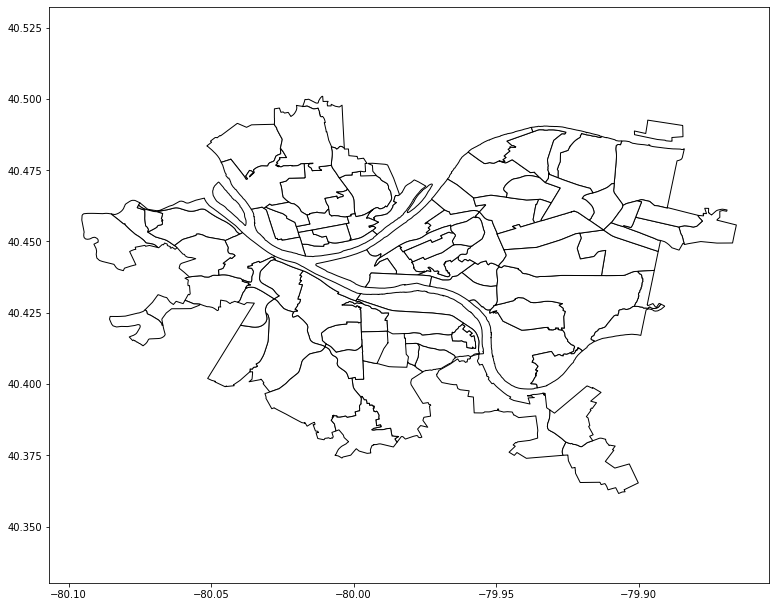